# Vibration Testing,  Test 1, Spring 2016

\noindent Closed book, closed notes.  Test booklets will be provided. Problems are 10 points each unless otherwise stated. 
Formula sheet must be turned in with the exam.

Problem 1. A common occurrence when using an impulse hammer is an accidental double strike. 

a.  Determine the Fourier Transform of $f(t) = \delta(t)+\delta(t-\Delta t)$ where $\Delta t$ is the time difference between first and second strike. 
b. Compare this to the Fourier Transform of $f(t) = \delta(t)$ by explaining how and when this difference can cause errors in the expected response of a multiple-mode linear system. 


The Fourier Transform of $\delta(t)$ is 

$$\int_{-\infty}^{\infty}\delta(t)e^{j 2 \pi f t}dt = e^{j 2 \pi f 0} = e^0 = 1$$

The Fourier Transform of $\delta(t)+\delta(t-\Delta t)$ is 

$$\int_{-\infty}^{\infty}(\delta(t)+\delta(t-\Delta t)+e^{j 2 \pi f t}dt = e^{j 2 \pi f 0} + e^{j 2 \pi f \Delta t}= e^0+ e^{j 2 \pi f \Delta t}$$

Applying the Euler Equation
$$\int_{-\infty}^{\infty}(\delta(t)+\delta(t-\Delta t)+e^{j 2 \pi f t}dt = 1+\cos 2\pi f \Delta t+j\sin 2\pi f \Delta t$$

The magnitude is

$$\sqrt{\left( 1+\cos 2\pi f \Delta t \right)^2
+\sin^2 2\pi f \Delta t
}$$

Since $\Delta t$ is presumed a fixed value, the amplitude will fluctuate as a function of $f$. 

This means you won't get constant excitation at all frequencies. The extreme case is when $f\Delta t=\frac{n}{2}$ where $n$ is an integer  (not equal to zero). In those cases

$$\sqrt{\left( 1+\cos 2\pi \frac{n}{2} \right)^2
+\sin^2 2\pi \frac{n}{2}
} = \sqrt{\left( 1+\cos 2\pi \frac{n}{2} \right)^2
+0
}$$

Note that for odd values of $n$, $\cos 2\pi \frac{n}{2}=-1$, and the amplitude of the excitation will be zero. 

So, at frequencies such that $f\Delta t=\frac{n}{2}$ where $n$ is an odd integer there will be no excitation of that frequency leaving you will unexcited frequencies, and potential blind spots in your response. 


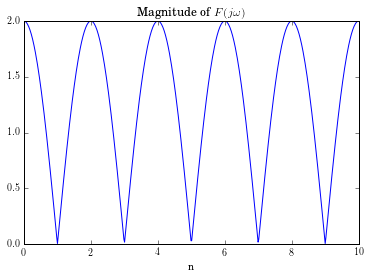

In [15]:
% matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
n = sp.linspace(0,10,500)
plt.plot(n,sp.sqrt((1+sp.cos(2*sp.pi*n/2))**2+(sp.sin(2*sp.pi*n/2))**2),'-')
plt.xlabel('n')
plt.title('Magnitude of $F(j\omega)$')

 


Problem 2. A random variable has a triangular distribution defined by the probability density function
$$p_x(x) =
\begin{cases}
A\left(1-\frac{|x|}{a}\right),&-a<x<a\\
0, &\text{otherwise}
\end{cases}
$$

Presume $a$ is a defined (known) variable (*This does not mean you pick a number!*). In terms of $a$

a. Determine $A$
b. $\mu_{x}$
c. $\sigma_{x}$
d. $\kappa_{x}$


a. $\int_{-a}^{a}A\left(1-\frac{|x|}{a}\right)dx = Aa$,
so $A=\frac{1}{a}$

b. $\mu_{x} = \int_{-a}^{a}x\frac{1}{a}\left(1-\frac{|x|}{a}\right)dx=0$

c. $\sigma_{x}^2=\int_{-a}^{a}x^2\frac{1}{a}\left(1-\frac{|x|}{a}\right)dx = \frac{a^2}{6}$ so $\sigma_{x} = \frac{a}{\sqrt{6}}$

d. $\kappa_{x}=\frac{1}{\sigma_x^2}\int_{-a}^{a}x^4\frac{1}{a}\left(1-\frac{|x|}{a}\right)dx = \frac{\sqrt{6}^4}{a^4}\frac{a^4}{15}=\frac{36}{15}$ 

Problem 3. Estimate the natural frequencies, mass normalized mode shapes, mass matrix, and stiffness matrix for the system whose inertance FRFs are

<img src="H11.png">

<img src="H12.png">

Because these are intertance FRFs, we have to remember that they are multiplied by $\omega^2$. 

The amplitudes are in Decibels, so we have, in order and approximately, $-175$ dB and $-156$ dB for the first mode, with $-178$ dB and $-181$ dB for the second. Converted to non-dB values, dB is $20 \log_10$ so in raw amplitude we get

$$\begin{bmatrix}
1.778e-09&1.259e-09\\
1.585e-08&8.913e-10
\end{bmatrix}
$$
Noting that every peak has a phase of $-90^{o}$, the $2, 2$ element needs a sign change, so


$$\begin{bmatrix}
1.778e-09&1.259e-09\\
1.585e-08&-8.913e-10
\end{bmatrix}
$$

(these are non-mass normalized mode shapes). 
Noting that the FRF is

$$\sum \mathbf{\psi_i}\mathbf{\psi_i}^T \tilde{h}_i$$
and
$$\tilde{h}_i = \frac{\omega^2}{\omega_i^2+2\zeta_i\omega_i\omega j-\omega^2}$$
at the peaks
$$\tilde{h}_i = \frac{\omega_i^2}{2\zeta_i\omega_i\omega_i j}  = \frac{1}{2\zeta_i j}$$

Since the first FRF is collocated, the peaks have approximate magnitudes of the first element of the corresponding mass normalized mode shape squared divided by $2\zeta_i$. We don't realistically know $\zeta_i$. 

So, 

$$\psi_{1,1} = \sqrt{1.778e-09\times 2\times\zeta_1}=5.96\times 10^{-5}\sqrt{\zeta_i}$$

The first column of the matrix is the non-mass normalized mode shape. Since we know the first value of the first mode shape, and the ratio must remain

$$\boldsymbol{\psi}_1=\begin{bmatrix}5.96\times 10^{-5}\sqrt{\zeta_i}\\5.32\times 10^{-5}\sqrt{\zeta_i}\end{bmatrix}$$

Likewise, the second mass-normalized mode shape is

$$\boldsymbol{\psi}_2=\begin{bmatrix}5.02\times 10^{-5}\sqrt{\zeta_i}\\-3.55\times 10^{-5}\sqrt{\zeta_i}\end{bmatrix}$$

Since $\Psi^T M \Psi = I$, then $M = (\Psi^T)^{-1}\Psi^{-1}$
$$M = \begin{bmatrix}
\frac{3.40862\times 10^8}{\zeta _2}+\frac{1.52258\times 10^6}{\zeta _1} &
   \frac{2.15069\times 10^6}{\zeta _1}-\frac{3.82454\times 10^7}{\zeta _2} \\
 \frac{2.15069\times 10^6}{\zeta _1}-\frac{3.82454\times 10^7}{\zeta _2} &
   \frac{4.2912\times 10^6}{\zeta _2}+\frac{3.03794\times 10^6}{\zeta _1}
   \end{bmatrix}$$

Likewise, since $\Psi^T K \Psi = I\Lambda$, then $K = (\Psi^T)^{-1}\Lambda\Psi^{-1}$
$$K = \begin{bmatrix}
\frac{3.10044\times 10^{15}}{\zeta _2}+\frac{3.84699\times 10^{11}}{\zeta _1} &
   \frac{5.43401\times 10^{11}}{\zeta _1}-\frac{3.47875\times 10^{14}}{\zeta _2} \\
 \frac{5.43401\times 10^{11}}{\zeta _1}-\frac{3.47875\times 10^{14}}{\zeta _2} &
   \frac{3.90322\times 10^{13}}{\zeta _2}+\frac{7.67574\times 10^{11}}{\zeta _1}
   \end{bmatrix}$$

My guess is that the skill set didn't exist for the last step, so we'll just consider that bonus. 

Since we had to estimate numbers the whole way, this problem is about demonstrating the process. 

**Problem 4.** (3 points) What is the practical limitation of using an impulse hammer when trying to identify the location of the anti-resonances?

Zeros depend on the location of the excitation, and with a hammer, it's very hard to keep it constant. 

**Problem 5.** (3 points) A system with natural frequencies of $\omega_{1} = 3$ and $\omega_{2}=10$ and mode shapes 

$$\Psi = \begin{bmatrix}
1&3\\
-3&7
\end{bmatrix}
$$
is released from rest (zero velocity) with the initial displacement

$$
\mathbf{x}(0) = \begin{bmatrix}3\\7\end{bmatrix}$$
Write $\mathbf{x}(t)$. 

Since $\mathbf{x}(t) = \boldsymbol{\psi}_1 r_1 + \boldsymbol{\psi}_2 r_2$ and $r_i=a\cos\omega_i t+ b\sin \omega_i t$, by observation 

$$\mathbf{x}(t) = \begin{bmatrix}3\\7\end{bmatrix} \cos 10 t$$

**Problem 6.** (4 points) A single degree of freedom system is defined by the  equation
  $$10\ddot{x}+.01\dot{x}+1000x=\sin(\omega t)$$
Find $\ddot{x}$. 

Rewriting, we get
$$\ddot{x}+0.001\dot{x}+100x=\frac{1}{10}\sin(\omega t)$$

The complex acceleration magnitude is given by
$$\frac{-\omega^2}{100-\omega^2+0.001\times \omega\times j}$$


The amplitude is

$$A=\frac{\omega^2}{\sqrt{(100-\omega^2)^2+(0.001\times \omega)^2}}$$
with a phase of

$$\phi=\pi +\arctan\frac{-0.001\times \omega}{100-\omega^2}$$

$$a(t) = A \sin(t +\phi)$$
We have to be cautious to make sure we end up in the correct quadrant for $\phi$. The $\arctan$ must end up in the 3rd or 4th quadrant.

In [16]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [23]:
%matplotlib --help

UsageError: unrecognized arguments: --help

In [24]:
%quickref

In [25]:
%magic